# Campeonato Brasileiro - Melhor estádio

Esse projeto usa dados fictícios, encontrados na plataforma *Kaggle*: https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol

### Tratamento dos dados

#### Dataframes

In [22]:
import pandas as pd
import os

cartoes = pd.read_csv(os.getcwd() + '\data\campeonato-brasileiro - cartoes.csv')
gols = pd.read_csv(os.getcwd() + '\data\campeonato-brasileiro - gols.csv')
estadios = pd.read_csv(os.getcwd() + '\data\campeonato-brasileiro - estadios.csv')
df = pd.read_csv(os.getcwd() + '\data\campeonato-brasileiro - base.csv', parse_dates=['data'], dayfirst=True)

#### Feature Engineering

In [23]:
df["pontos_mandante"] = 0

for i, row in df.iterrows():
    if(row['mandante'] == row['vencedor']): df.loc[i,'pontos_mandante'] = 3;
    elif(row['vencedor'] == '-'): df.loc[i,'pontos_mandante'] = 1;
    else: df.loc[i,'pontos_mandante'] = 0;

anos = range(2002, 2022);

df['ano'] = pd.DatetimeIndex(df['data']).year;

In [24]:
resultados = pd.DataFrame()

for ano in anos:
    for i, row in estadios.iterrows():
        pontos_feitos = sum((df["pontos_mandante"] != 0) & (df["arena"] == row['Estádio']) & (df["ano"] == ano))
        pontos_totais = sum((df["arena"] == row['Estádio']) & (df["ano"] == ano))*3

        pontos_totais_possiveis = sum((df["mandante"] == row['Time']) & (df["ano"] == ano))*3 + sum((df["visitante"] == row['Time']) & (df["ano"] == ano))*3
        pontos_feitos_possiveis = (
                                   sum((df["vencedor"] == row['Time']) & (df["ano"] == ano))*3 +
                                   sum((df["visitante"] == row['Time']) & (df["ano"] == ano) & (df["vencedor"] == "-")) +
                                   sum((df["mandante"] == row['Time']) & (df["ano"] == ano) & (df["vencedor"] == "-"))
                                  )

        try:
            p = (pontos_feitos/pontos_totais)*(pontos_feitos_possiveis/pontos_totais_possiveis)
        except ZeroDivisionError:
            p = 0

        resultados.loc[row['Estádio'], ano] = p

for i, row in estadios.iterrows():
    resultados.loc[row['Estádio'], :]

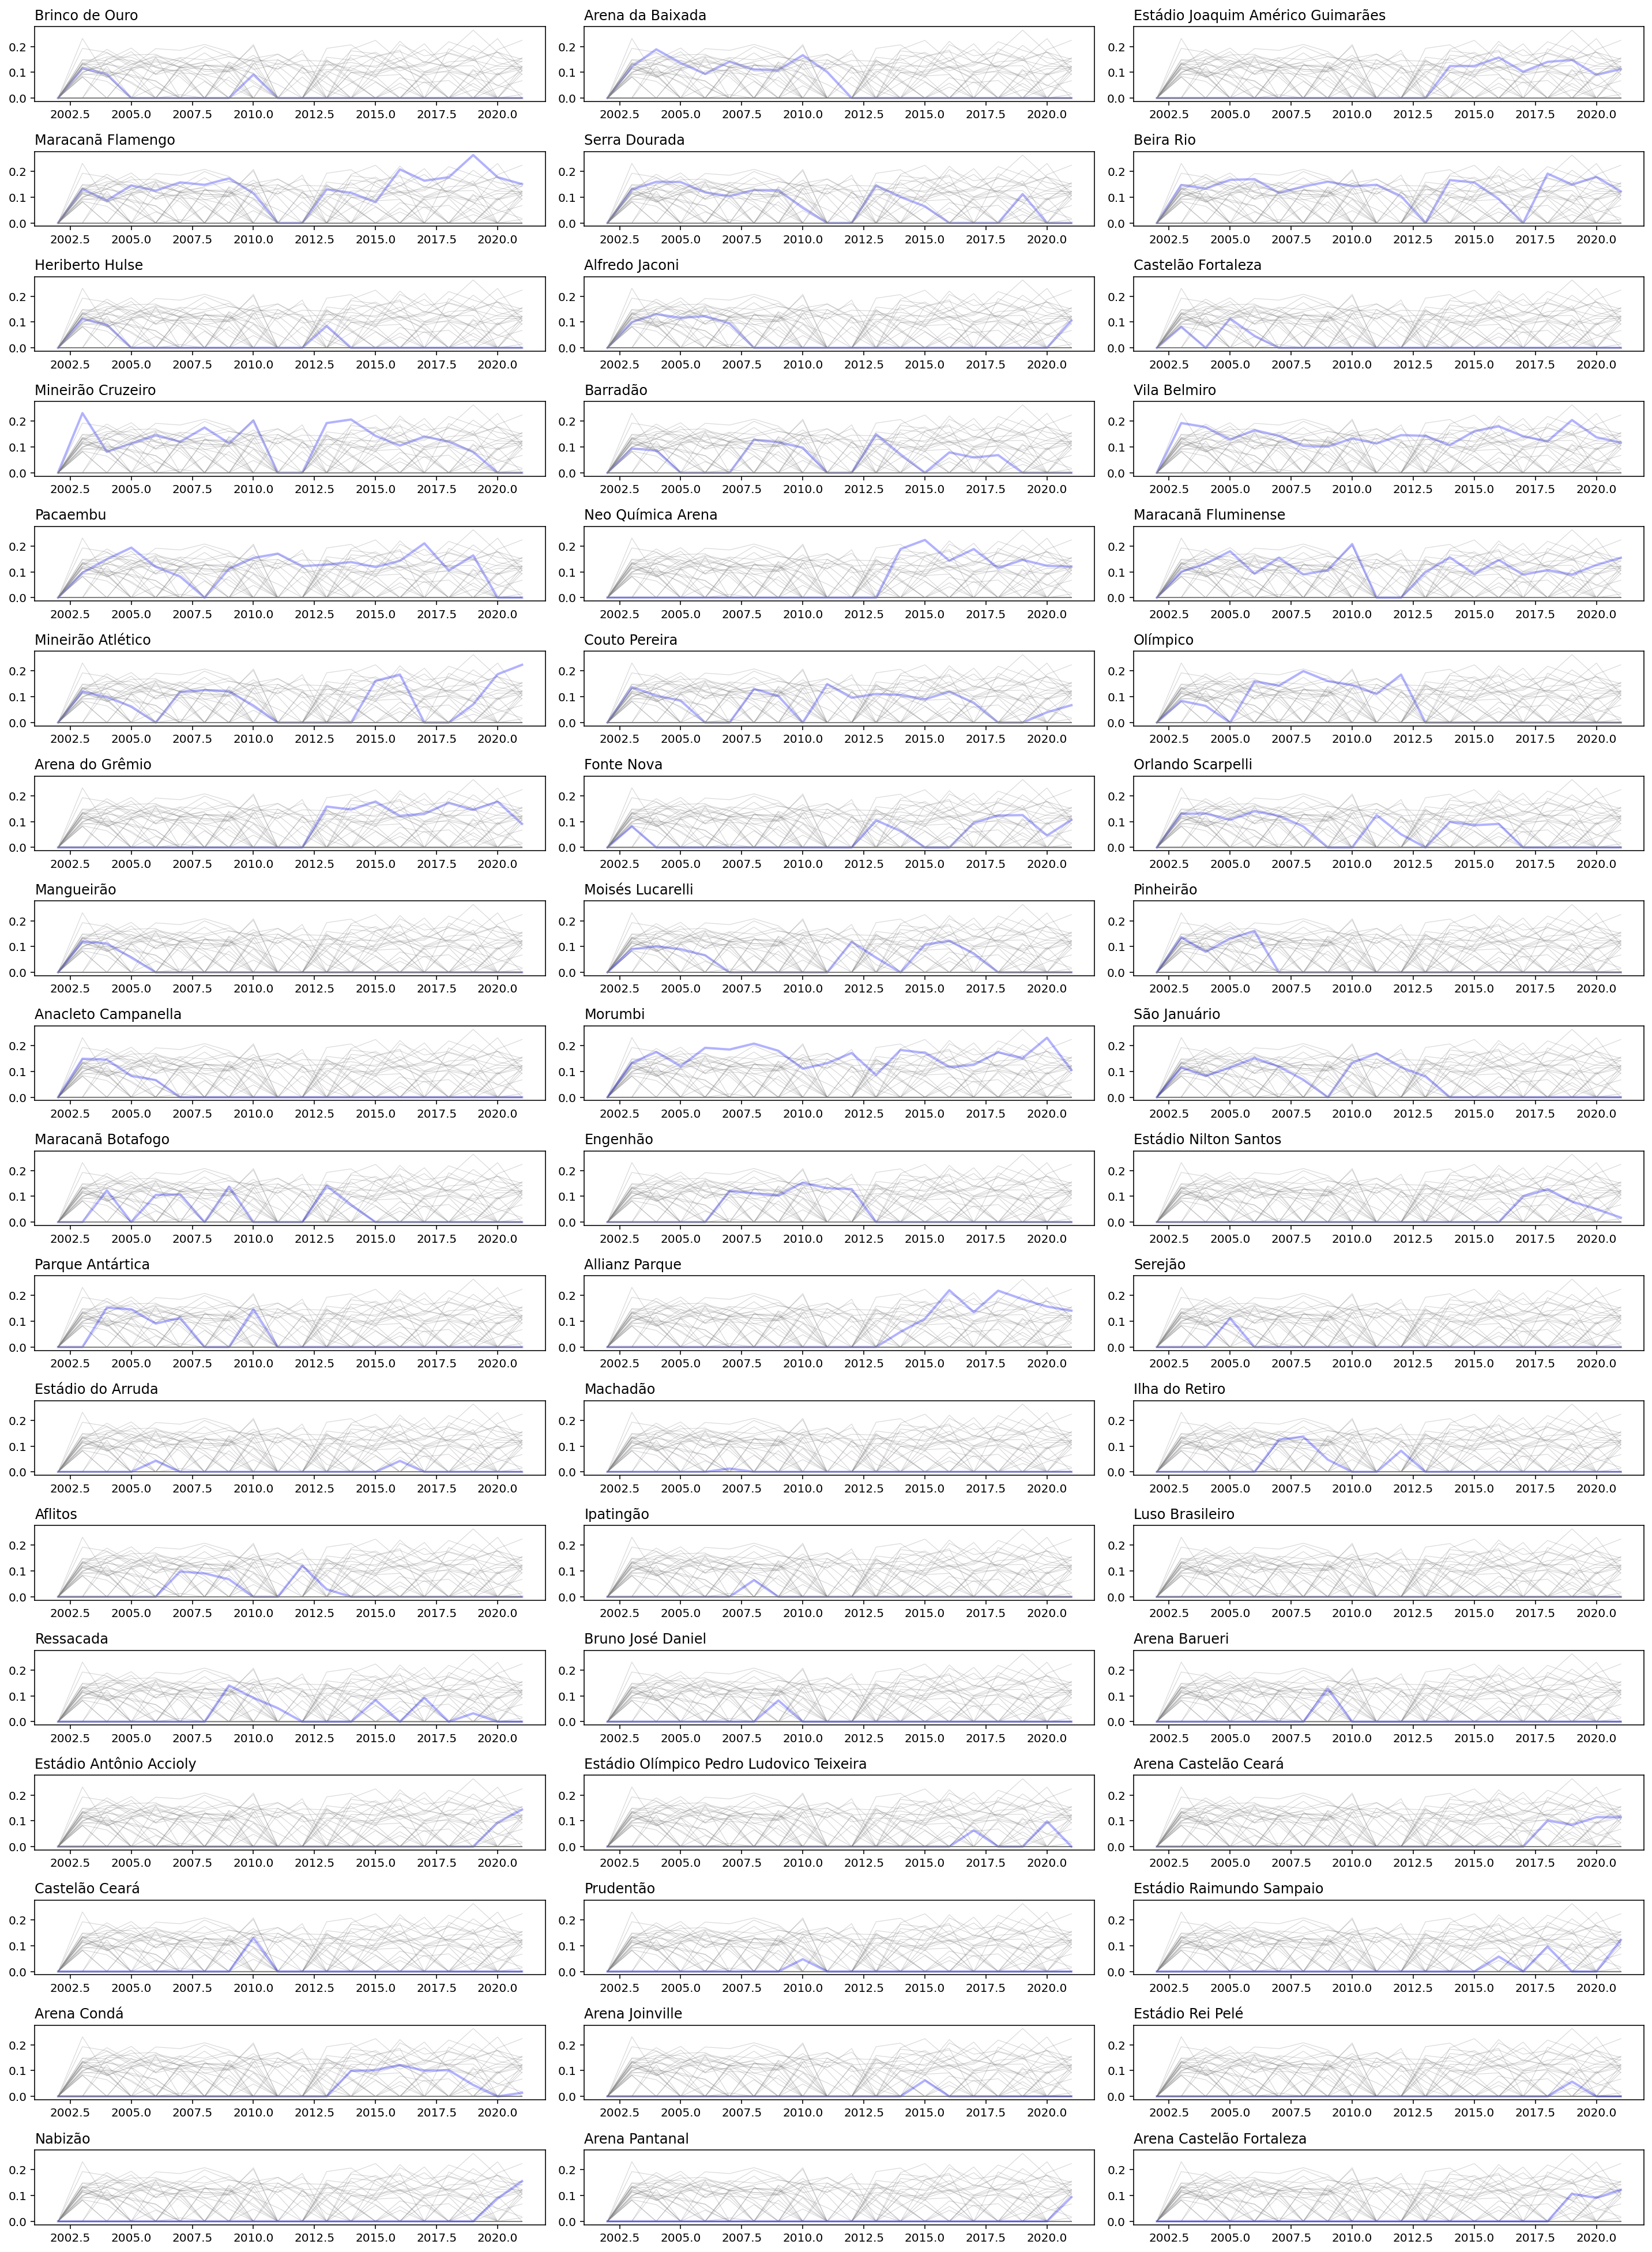

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 30), dpi=144, tight_layout=True)

i = 0

for estadio in estadios['Estádio'].unique():
    i += 1
    plt.subplot(20,3,i)

    for e in estadios['Estádio'].unique():
        plt.title(estadio, loc='left', fontsize=12, fontweight=0)
        if(e == estadio):
            plt.plot(list(range(2002, 2022)), resultados.loc[e, :].tolist(), color='blue', linewidth=2, alpha=0.3)
        else:
            plt.plot(list(range(2002, 2022)), resultados.loc[e, :].tolist(), color='grey', linewidth=0.6, alpha=0.3)
 